In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler


In [19]:
df = pd.read_csv("/Users/lucasking/Library/CloudStorage/OneDrive-Personal/桌面/BU/MF 810 Advanced programming/Final project/stock_data_5yr.csv")
df_clean = df.copy()



In [21]:
print(df.shape)
print(df_clean.shape)

(1201726, 79)
(1201726, 79)


In [22]:

base_cols = [
    "Date", "Open", "High", "Low", "Close",
    "Volume", "Dividends", "Stock Splits", "Ticker"
]

# 2. 其餘的就都當作是指標欄位
indicator_cols = [col for col in df.columns if col not in base_cols]

print("偵測到的指標欄位：", indicator_cols)

# 3. 用 dropna，只針對這些指標欄位，how="all" 表示「如果這一列在所有指標欄位都是 NaN，就丟掉」
df_clean = df.dropna(subset=indicator_cols, how="any")

print(f"原始資料有 {len(df)} 列，清理後剩 {len(df_clean)} 列")

# （可選）檢查看還剩不剩少量遺漏值
print(df_clean[indicator_cols].isna().mean().sort_values(ascending=False))

偵測到的指標欄位： ['Return1', 'Gap', 'HL_Range', 'OC_Return', 'SMA5', 'EMA5', 'SMA10', 'EMA10', 'SMA20', 'EMA20', 'SMA50', 'EMA50', 'SMA100', 'EMA100', 'MACD', 'MACD_Signal', 'MACD_Diff', 'RSI14', 'ROC5', 'ROC10', 'ROC20', 'StochK', 'StochD', 'WilliamsR14', 'BB_HBand', 'BB_LBand', 'BB_Width', 'KC_HBand', 'KC_LBand', 'DC_HBand', 'DC_LBand', 'ATR14', 'ATR28', 'CCI20', 'ADX14', 'MassIndex', 'UltimateOsc', 'CMO14', 'OBV', 'AccDistIdx', 'ChaikinMF20', 'ForceIdx1', 'EaseOfMov14', 'VWAP14', 'Ichimoku_Conv', 'Ichimoku_Base', 'Vortex_pos', 'Vortex_neg', 'RollMaxH5', 'RollMinL5', 'RollMaxH10', 'RollMinL10', 'RollMaxH20', 'RollMinL20', 'RollMaxH50', 'RollMinL50', 'Autocorr1', 'Skew10', 'Kurt10', 'Sharpe10', 'Drawdown20', 'ZScore10', 'SMA5_20_D', 'Momentum5', 'Momentum10', 'Vol_Ret5', 'Vol_Ret10', 'Vol_Ret20', 'Vol_MA5', 'Vol_MA10']
原始資料有 1201726 列，清理後剩 1102008 列
Return1          0.0
Ichimoku_Conv    0.0
RollMaxH10       0.0
RollMinL5        0.0
RollMaxH5        0.0
                ... 
DC_HBand         0

In [23]:
df_clean.shape

(1102008, 79)

### Delete 8.29% data

In [24]:
df_clean.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Return1,...,Drawdown20,ZScore10,SMA5_20_D,Momentum5,Momentum10,Vol_Ret5,Vol_Ret10,Vol_Ret20,Vol_MA5,Vol_MA10
89756,2020-09-16 00:00:00-04:00,98.074359,98.365003,95.022553,96.805191,1365000,0.0,0.0,A,-0.004483,...,-0.080062,0.423359,0.382684,0.020321,-0.011867,0.005948,0.021147,0.015243,1385660.0,1431750.0
89757,2020-09-16 00:00:00-04:00,13.423161,13.577450,13.215835,13.403874,5583300,0.0,0.0,AA,0.008708,...,-0.099935,-0.755348,-0.634997,-0.014185,-0.078860,0.017018,0.016956,0.023000,4408840.0,4358180.0
89758,2020-09-16 00:00:00-04:00,13.210000,13.960000,12.980000,13.800000,75200100,0.0,0.0,AAL,0.050228,...,-0.118841,1.707258,0.093500,0.057471,0.053435,0.025242,0.024189,0.033969,50050660.0,61224690.0
89759,2020-09-16 00:00:00-04:00,37.456000,38.047958,37.345417,37.625134,305700,0.0,0.0,AAON,0.007666,...,-0.066756,1.406420,-0.334034,0.039540,0.012251,0.003687,0.010729,0.008754,325530.0,280395.0
89760,2020-09-16 00:00:00-04:00,112.360634,113.111457,109.250067,109.337822,154679000,0.0,0.0,AAPL,-0.029513,...,-0.165300,-0.847044,-7.138451,-0.044238,-0.164331,0.025638,0.038061,0.034320,168521160.0,204123870.0


In [27]:
print(df.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Ticker', 'Return1', 'Gap', 'HL_Range', 'OC_Return', 'SMA5', 'EMA5', 'SMA10', 'EMA10', 'SMA20', 'EMA20', 'SMA50', 'EMA50', 'SMA100', 'EMA100', 'MACD', 'MACD_Signal', 'MACD_Diff', 'RSI14', 'ROC5', 'ROC10', 'ROC20', 'StochK', 'StochD', 'WilliamsR14', 'BB_HBand', 'BB_LBand', 'BB_Width', 'KC_HBand', 'KC_LBand', 'DC_HBand', 'DC_LBand', 'ATR14', 'ATR28', 'CCI20', 'ADX14', 'MassIndex', 'UltimateOsc', 'CMO14', 'OBV', 'AccDistIdx', 'ChaikinMF20', 'ForceIdx1', 'EaseOfMov14', 'VWAP14', 'Ichimoku_Conv', 'Ichimoku_Base', 'Vortex_pos', 'Vortex_neg', 'RollMaxH5', 'RollMinL5', 'RollMaxH10', 'RollMinL10', 'RollMaxH20', 'RollMinL20', 'RollMaxH50', 'RollMinL50', 'Autocorr1', 'Skew10', 'Kurt10', 'Sharpe10', 'Drawdown20', 'ZScore10', 'SMA5_20_D', 'Momentum5', 'Momentum10', 'Vol_Ret5', 'Vol_Ret10', 'Vol_Ret20', 'Vol_MA5', 'Vol_MA10']


In [29]:
df_clean.isna().sum().sum()

0

In [32]:
# 0. 假設你已經有一個 df_clean，裡面包含所有原始欄位 + 之前算好的各種指標

# 1. 先把資料按照 Ticker + Date 排序、重設 index
df_clean = (
    df_clean
    .sort_values(["Ticker", "Date"])
    .reset_index(drop=True)
)

# 2. 計算「同一隻股票」的 next‐day close
#    用 groupby + shift(-1)，確保不會把 AAPL 的最後一天 shift 到 MSFT
df_clean["Close_next"] = (
    df_clean
    .groupby("Ticker")["Close"]
    .shift(-1)
)

# 3. 產生二元目標：明天收盤價是否高於今天？
df_clean["Target"] = (df_clean["Close_next"] > df_clean["Close"]).astype(int)

# 4. 把因為 shift 而變成 NaN 的那些「每隻股票最後一天」刪掉
df_clean = df_clean.dropna(subset=["Target"])

# 5. 定義 features 欄位：排除你不想用的欄位
exclude = [
    "Date", "Ticker", "Close_next", "Target",
    # 以下是原始價格欄，也不當 feature
    "Open", "High", "Low", "Close", "Volume"
]
feature_cols = [c for c in df_clean.columns if c not in exclude]

# 6. 示範：把每隻股票拆出來，各用它本身的資料做 X, y
X_by_ticker = {}
y_by_ticker = {}
for tkr, group in df_clean.groupby("Ticker"):
    X_by_ticker[tkr] = group[feature_cols]
    y_by_ticker[tkr] = group["Target"]

# 7. （以 AAPL 為例）你可以這樣取出 AAPL 的訓練資料：
X_AAPL = X_by_ticker["AAPL"]
y_AAPL = y_by_ticker["AAPL"]

# 8. 如果你只想做一個統一模型，也可以直接：
X = df_clean[feature_cols]
y = df_clean["Target"]

# 現在就可以把 X, y 傳給 scikit‐learn 或其他模型去訓練了

RF Test Accuracy: 0.5078475579689695
RF Top 15 features:
 Gap            0.021870
MassIndex      0.021692
Autocorr1      0.021507
UltimateOsc    0.020998
ChaikinMF20    0.020828
Skew10         0.020588
Kurt10         0.020501
HL_Range       0.020304
Vol_Ret5       0.019937
ADX14          0.019896
OC_Return      0.019849
Vortex_neg     0.019750
Vortex_pos     0.019701
ZScore10       0.019625
AccDistIdx     0.019584
dtype: float64


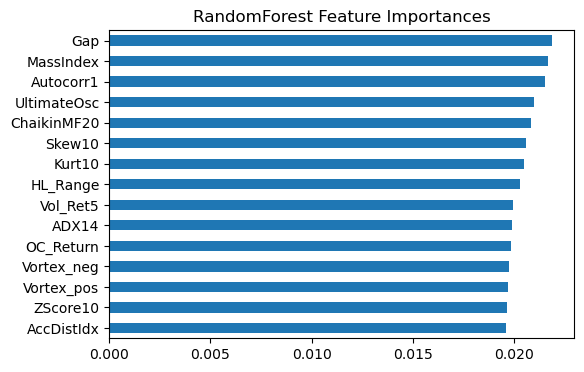

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import matplotlib.pyplot as plt



# 0. 假设 df_clean 已经是前面处理好：按 ticker+date 排序、加上 Target
#    并且 feature_cols 列出了所有你想尝试的技术指标

# 1. 按日期切训练/测试
#    比如：2024-01-01 以前当训练，之后当测试
split_date = "2024-01-01"
train_mask = df_clean["Date"] < split_date
X_train, y_train = df_clean.loc[train_mask, feature_cols], df_clean.loc[train_mask, "Target"]
X_test,  y_test  = df_clean.loc[~train_mask, feature_cols], df_clean.loc[~train_mask, "Target"]

# 2. 随机森林模型
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# 3. 测试集表现
y_pred = rf.predict(X_test)
print("RF Test Accuracy:", accuracy_score(y_test, y_pred))

# 4. 特征重要度（降序）
imp_rf = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("RF Top 15 features:\n", imp_rf.head(15))

# 5. 可视化前 15
plt.figure(figsize=(6,4))
imp_rf.head(15).plot.barh()
plt.gca().invert_yaxis()
plt.title("RandomForest Feature Importances")
plt.show()

# ——可选：带 L1 正则的逻辑回归，稀疏化特征——
lr = LogisticRegression(penalty="l1", solver="saga", C=1.0, max_iter=5000, n_jobs=-1)
lr.fit(X_train, y_train)
coef_abs = pd.Series(np.abs(lr.coef_[0]), index=feature_cols).sort_values(ascending=False)
print("LR Top 15 features:\n", coef_abs.head(15))

# ——时间序列交叉验证看整体稳定性——
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(rf, df_clean[feature_cols], df_clean["Target"],
                            cv=tscv, scoring="accuracy", n_jobs=-1)
print("RF TimeSeries CV Accuracy:", cv_scores, "mean=", cv_scores.mean())